In [3]:
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os

%matplotlib inline  
pd.options.display.mpl_style = 'default'
pylab.rcParams['figure.figsize'] = 12, 6 

price_dict = {'none' : None}



In [81]:

def strat1(ticker_list):
    final_df = pd.DataFrame()
    for ticker in ticker_list:
        def get(ticker):
            if ticker in price_dict:
                temp_df = price_dict[ticker]
            else:    
                temp_df = pd.read_csv("https://www.quandl.com/api/v3/datasets/YAHOO/"+ticker+".csv")
                temp_df.index = pd.to_datetime(temp_df.Date)
                temp_df = temp_df.sort()
                price_dict[ticker] = temp_df
            return temp_df
        ret_df = get(ticker)
        ret_df['ret'] = ret_df.Close.shift(-1) - ret_df.Close
        return_df = ret_df
        return_df['day1'] = np.where(return_df.ret > return_df.ret.shift(1), 1, 0)
        return_df['five_days'] = np.where(return_df.day1 + return_df.day1.shift(1) +
                                 return_df.day1.shift(2) + return_df.day1.shift(3) +
                                 return_df.day1.shift(4) + return_df.day1.shift(5) == 5, 1, 0)
        return_df['trade_yes'] = np.where(return_df.five_days == 1, 1, 0)
        return_df['ret_long'] = np.where(return_df.trade_yes == 1, return_df.ret + return_df.ret.shift(-1) +
                                 return_df.ret.shift(-2) + return_df.ret.shift(-3) +
                                 return_df.ret.shift(-4) + return_df.ret.shift(-5), 0)
        return_df['ret_short'] = -1 * return_df.ret_long
        return_df = return_df[return_df.index.year > 2000]
        final_df = final_df.append(return_df)
    final_df = final_df.sort()    
    length = int(final_df.ret_long.size / 15.0 / 12.0)
    global sharpe_df
    sharpe_df = final_df.ret_long.cumsum()[::length].shift(-1) - final_df.ret_long.cumsum()[::length]
    yearly_sharpe = sharpe_df.mean() * math.sqrt(12.0) / sharpe_df.std()
    final_df.ret_long.cumsum().plot(title = str(ticker_list)+ 
                                    "\n--Five Day Trade--"+
                                    "\nNumber of Trades = " + str(int(final_df.trade_yes.sum()))+ 
                                    "\nWin Percentage = " + str(int(final_df[final_df.ret_long > 0].ret.size) 
                                                                / float(final_df.trade_yes.sum())) +
                                    "\nSharpe = " + str(yearly_sharpe));
    return final_df

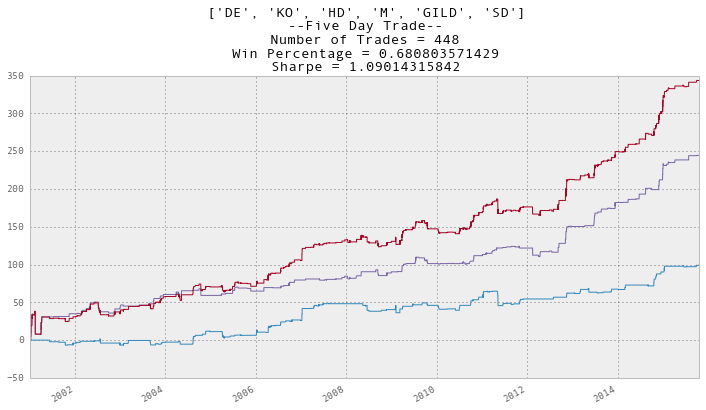

In [83]:
a=strat1(['DE', 'KO', 'HD'])
b = strat1(['M','GILD','SD'])
c = strat1(['DE', 'KO', 'HD','M','GILD','SD'])
